In [34]:
import sympy
sympy.init_printing()

In [35]:
z = sympy.Symbol('z')
T_o = sympy.Symbol('T_o')



zeta = sympy.exp(1j*2*sympy.pi/T_o)




f_z=sympy.Eq((z-zeta**0)*(z-zeta**1)*(z-zeta**2)*(z-zeta**3)*(z-zeta**4)*(z-zeta**5))



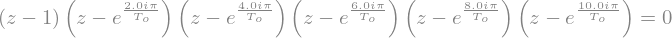

In [36]:
f_z

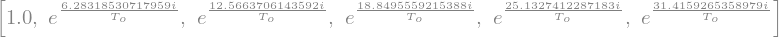

In [37]:
sympy.solve(f_z,z)

In [38]:
expreso = (z-zeta**0)*(z-zeta**1)*(z-zeta**2)*(z-zeta**3)*(z-zeta**4)*(z-zeta**5)

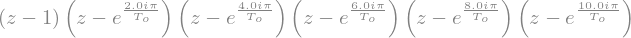

In [39]:
expreso

In [40]:
zz=sympy.expand(expreso)

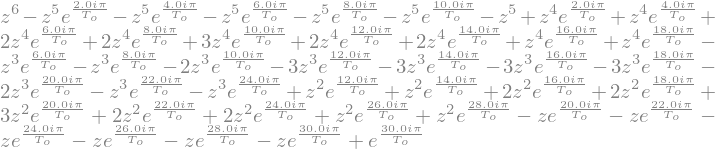

In [41]:
zz

In [42]:
zzz = sympy.collect(zz,z)

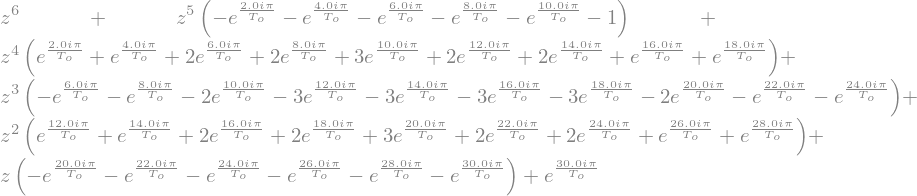

In [43]:
zzz

In [44]:
expresos=expreso*(z-zeta**6)

In [45]:
zzss=sympy.expand(expresos)
zzzsss = sympy.collect(zzss,z)


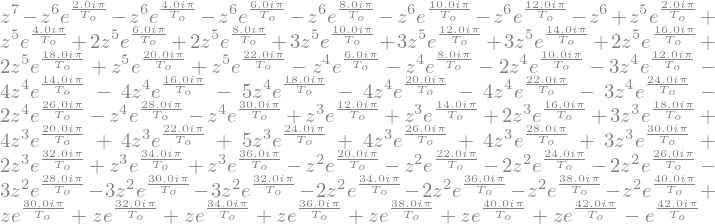

In [46]:
zzss

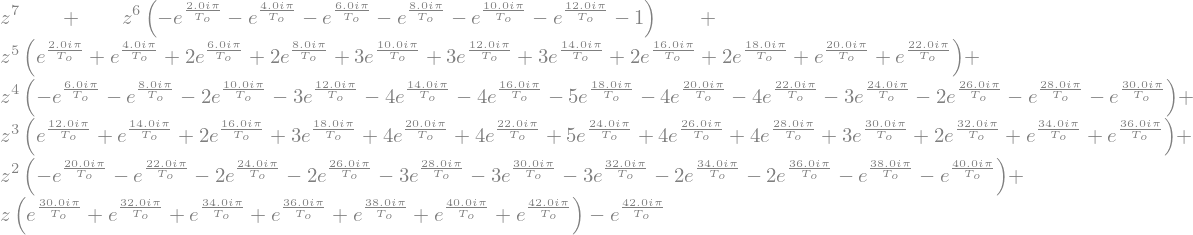

In [47]:
zzzsss

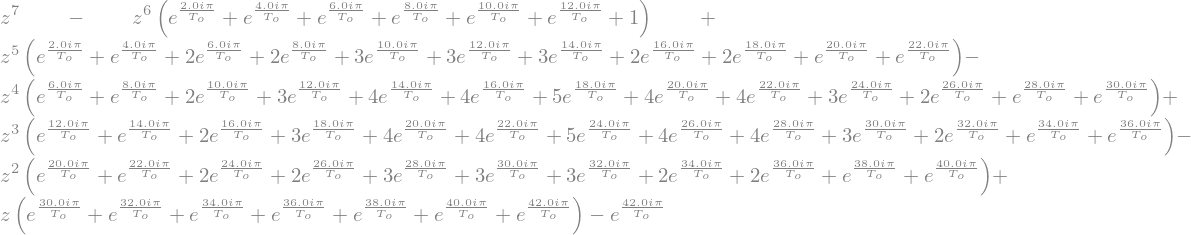

In [48]:
sympy.simplify(zzzsss)

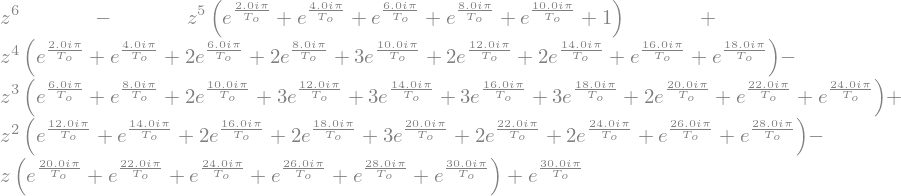

In [49]:
sympy.simplify(zzz)

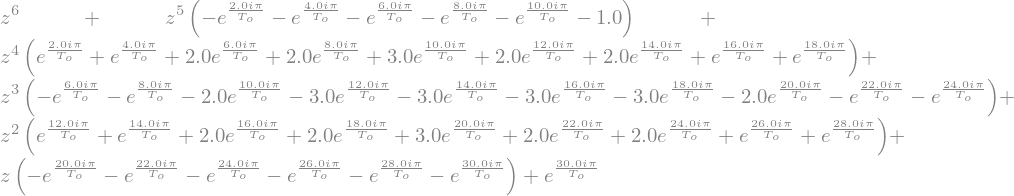

In [50]:
zzz.evalf(subs={T_o:6})

In [51]:
from sympy.abc import alpha, beta, zeta 



In [52]:
zeta = sympy.Symbol('zeta',complex=True)

In [53]:
expreso = (z-zeta**0)*(z-zeta**1)*(z-zeta**2)*(z-zeta**3)*(z-zeta**4)*(z-zeta**5)

In [54]:
expreso

In [55]:
fff=sympy.expand(expreso*(z-zeta**6))
ffff = sympy.collect(fff,z)


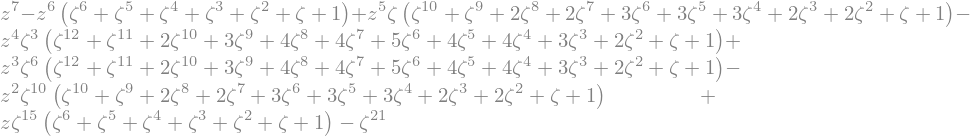

In [56]:
sympy.simplify(ffff)

In [57]:
# Evaluate ffff using zeta

eval_f_z = sympy.Eq(ffff,0)

In [58]:
sympy.solve(eval_f_z)

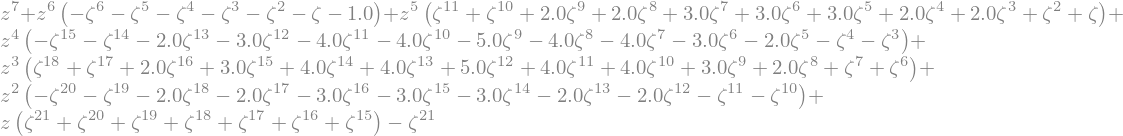

In [59]:
ffff.evalf(subs={T_o:13,zeta:sympy.exp(1j*2*sympy.pi/7)})

In [60]:
expreso = (z-zeta**1)*(z-zeta**1)*(z-zeta**2)*(z-zeta**2)*(z-zeta**3)*(z-zeta**3)

In [61]:
expreso

In [62]:
fff=sympy.expand(expreso)
ffff = sympy.collect(fff,z)


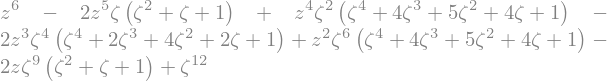

In [63]:
sympy.simplify(ffff)

## golden-ratio period of a Mod 13 Wheel



In [64]:
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

In [65]:
import pandas as pd
import numpy as np

path='biased_six_dice.xls'
# import excel file from path , parsing 'Sheet1'
biased_six_map = pd.read_excel(path,sheet_name='Sheet1')
# Set S as an index in biased_six_map
biased_six_map = biased_six_map.set_index('S')

In [66]:
data = pd.read_csv('roulette_data.csv')
basic_map = pd.read_csv('basic_map2.csv')
data.set_index('n', inplace=True)
basic_map.set_index('X', inplace=True)

In [67]:
S = np.array(data.S.values)
x = np.array(basic_map.x.values)
S_x = np.empty(len(S))
S_x =[x[val] for val in S]

In [68]:
def get_biased_dice_data(S,start_index,batch_size):
    
    end_index=start_index+batch_size
    nn=np.arange(start_index,end_index)
    S_biased_six_vector=np.empty(nn.size,dtype=int)
    c=0
    for n in nn:
        S_biased_six_vector[c]=biased_six_map['S_biased_six'][S[n]]
        c+=1
    return nn, S_biased_six_vector


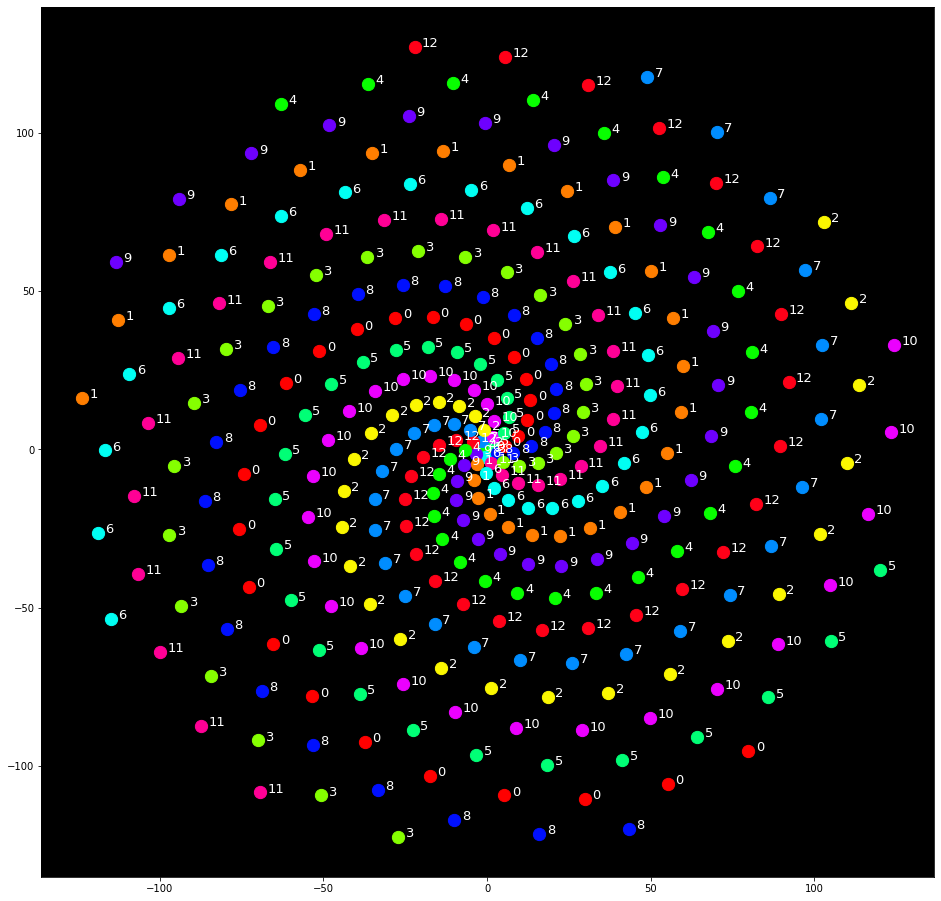

In [69]:
M=37
MM=37
mod=13
#T_o=6*2+1
T_o=0.5*(1+np.sqrt(5))
start_index = 50000
batch_size =13*26
input=S[start_index:start_index+batch_size]


nn,S_6=get_biased_dice_data(S,start_index,batch_size)
S_6_input =S_6
r_time_v   =np.zeros(nn.size,dtype=float)
zeta_v     =np.zeros(nn.size,dtype=complex)
cplx_index =np.zeros(nn.size,dtype=complex)
n_mod      =np.zeros(nn.size,dtype=int)
X_color = cm.get_cmap('hsv', mod)
ff=1/T_o**2
zeta       =np.exp(1j*2*np.pi/(np.max(S_6)+1))
delta      = 1/T_o
w_o        = 2*np.pi/T_o
plt.figure(figsize=(16,16))
plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "black",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "grid.color": "black",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})

zeta       =np.exp(1j*2*np.pi/M)
for n in np.arange(input.size):
    n_mod[n]=n%T_o
    if n_mod[n]==0:
        r_time_v[n]=r_time_v[n-1]+delta
    else:
        r_time_v[n]=r_time_v[n-1]
    cplx_index[n]=r_time_v[n]*np.exp(1j*w_o*n)
    plt.scatter(cplx_index[n].real,cplx_index[n].imag,color=X_color(n%mod),s=150)
    plt.text(cplx_index[n].real+6*ff,cplx_index[n].imag,str(n%mod),color='white',fontsize=13)
    zeta_v[n]=zeta**input[n]
    #plt.scatter(ff*np.log2(n+2)*zeta_v[n].real,ff*np.log2(n+2)*zeta_v[n].imag,color=X_color(input[n]),s=np.sqrt(T_o)*np.log2(n+2))
    #plt.scatter(cplx_index[n].real+2*ff*zeta_v[n].real,cplx_index[n].imag+2*ff*zeta_v[n].imag,color=X_color(n%T_o),s=9)
    #save a video frame by frame of current plots 
    #plt.savefig('mod_333_wheel_golden_ratio_'+str(n)+'.png')
    #append frame to animation

# Prime numbers in the golden 13 wheel 


In [74]:
def isPrime(N):
    for number in range(2, N):
        if N % number == 0:
            return False
    return True

In [108]:


def get_strange_wheel(input,M,mod,T_o,start_index,batch_size,final_title):

    r_time_v   =np.zeros(input.size,dtype=float)
    zeta_v     =np.zeros(input.size,dtype=complex)
    cplx_index =np.zeros(input.size,dtype=complex)
    n_mod      =np.zeros(input.size,dtype=int)
    X_color = cm.get_cmap('hsv', mod)
    ff=1/T_o**2
    zeta       =np.exp(1j*2*np.pi/(np.max(input)+1))
    delta      = 1/T_o
    w_o        = 2*np.pi/T_o
    plt.figure(figsize=(16,16))
    plt.rcParams.update({
            "lines.color": "black",
            "patch.edgecolor": "black",
            "text.color": "black",
            "axes.facecolor": "black",
            "axes.edgecolor": "black",
            "axes.labelcolor": "black",
            "xtick.color": "black",
            "ytick.color": "black",
            "grid.color": "black",
            "figure.facecolor": "black",
            "figure.edgecolor": "black",
            "savefig.facecolor": "black",
            "savefig.edgecolor": "black"})

    zeta       =np.exp(1j*2*np.pi/M)
    for n in np.arange(input.size):
        n_mod[n]=n%T_o
        if n_mod[n]==0:
            r_time_v[n]=r_time_v[n-1]+delta
        else:
            r_time_v[n]=r_time_v[n-1]
        cplx_index[n]=r_time_v[n]*np.exp(1j*w_o*n)

        #plt.text(cplx_index[n].real,cplx_index[n].imag,str(n),color=X_color(n%mod),fontsize=3)
        plt.scatter(cplx_index[n].real,cplx_index[n].imag,color=X_color(n%mod),s=6)
        if isPrime(n):
            #plt.text(cplx_index[n].real+6*ff,cplx_index[n].imag+6*ff,str(n%mod),color=X_color(n%mod),fontsize=9)
            plt.text(cplx_index[n].real+6*ff,cplx_index[n].imag,str(n),color=X_color(n%mod),fontsize=7)
            plt.scatter(cplx_index[n].real,cplx_index[n].imag,color=X_color(n%mod),s=60)
        zeta_v[n]=zeta**input[n]
    plt.savefig(final_title)
    return cplx_index,zeta_v,n_mod,r_time_v
        

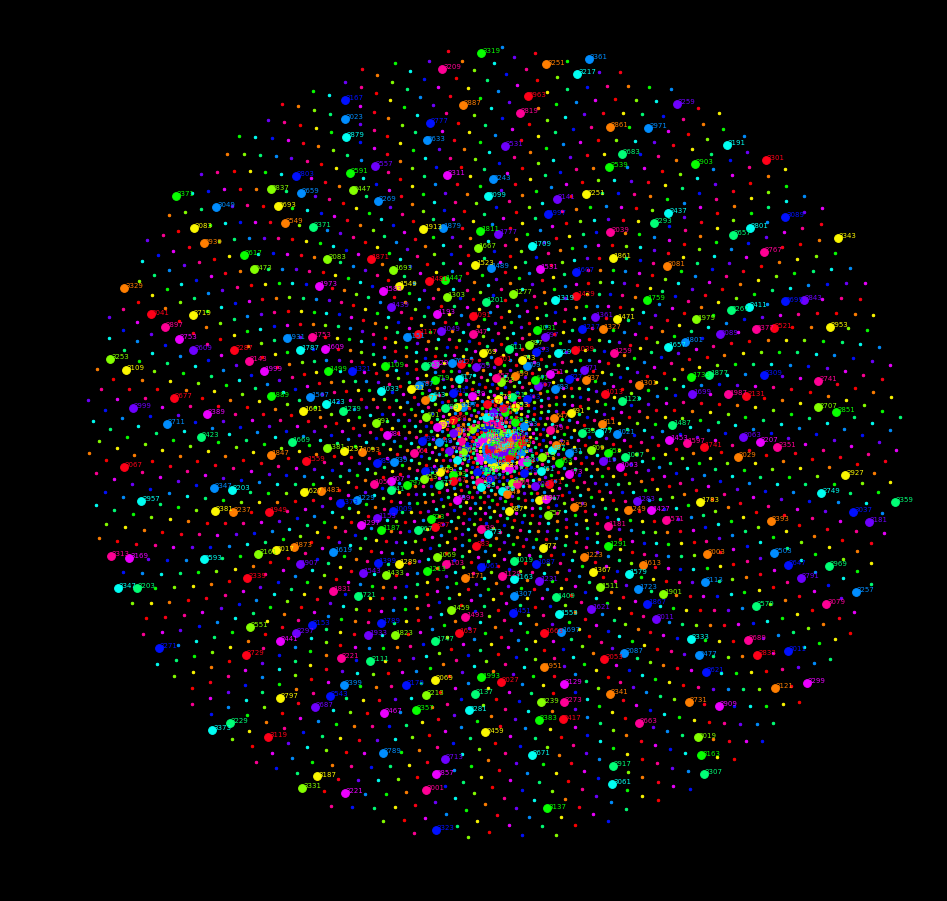

In [110]:
M=37
MM=37
mod=13
#T_o=6*2+1
T_o=0.5*(1+np.sqrt(5))
start_index = 5000
batch_size =13*260
input=S[start_index:start_index+batch_size]
final_title = 'mod_13_and_fibonacci.png' 
cplx_index,zeta_v,n_mod,r_time_v=get_strange_wheel(input,M,mod,T_o,start_index,batch_size,final_title)

In [ ]:
def isPrime(N):
    for number in range(2, N):
        if N % number == 0:
            return False
    return True